In [49]:
import io
import tempfile

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Install yellowbrick package if needed
from yellowbrick.cluster.elbow import KElbowVisualizer

def plot_and_log_image(X, labels, model_name):
    """
    Plots a 2D scatter plot of the reduced features and saves it to a file.
    The file is then logged to MLflow.

    Parameters
    ----------
    X : array-like
        The features to plot.
    labels : array-like of shape (n_samples,)
        The cluster labels.
    model_name : str
        The name of the model.
    params : dict
        The parameters of the model.
    """
    # Create SVD model and fit it to the data
    svd = TruncatedSVD(n_components=2)
    reduced_features = svd.fit_transform(X)

    # Plot the figure
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
    plt.title(f'Visualization of {model_name} Clusters')
    plt.colorbar()

    plt.show()

    # # Create a temporary directory using the context manager
    # with tempfile.TemporaryDirectory() as tmpdirname:
    #     # Define the filename
    #     filename = os.path.join(tmpdirname, "clusters.png")
    #     print(filename)
    #     # Save the plot to a file within the temporary directory
    #     plt.savefig(filename, format='png')
        
    #     # Log plot
    #     #mlflow.log_artifact(filename)


2023/06/07 18:52:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8e0530dad73540bcb283ad984ed58271', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\saloc\OneDrive\Desktop\Lernen\Unterlagen_Master_DS_HDM\SoSe23\Bi_Big_Data_DesignWS\BigDataBI-Workshop\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2023/06/07 18:52:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Anonymous credentials cannot be refreshed.
2023/06/07 18:52:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ba2d7f1453ed4772965c38261e7c10c8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn w

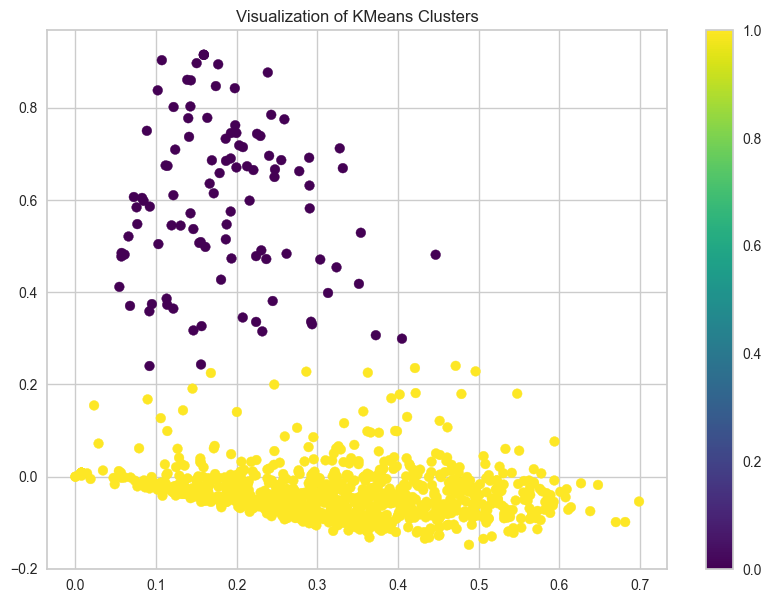

2023/06/07 18:52:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd00f3948e4a448f2a6792e5ff295e2f4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


ValueError: setting an array element with a sequence.

In [ ]:
# Description: This notebook is used for debugging and implementing new funtionalities to
# the run_modelling.py script regarding functions.

file_path = "../../data/processed/df_recipes.pkl"

df_recipes = pd.read_pickle(file_path)

# Prepare features
features = [
    ['preprocessed_ingredients'],
    #['preprocessed_steps'],
    #['preprocessed_description'],
    #['preprocessed_ingredients', 'preprocessed_steps'],
    #['preprocessed_ingredients', 'preprocessed_description'],
    #['preprocessed_steps', 'preprocessed_description'],
    #['preprocessed_ingredients', 'preprocessed_steps', 'preprocessed_description']
]

# Define a list of models
model_params = {
    'KMeans': {
        'model': KMeans(random_state=42),
        'params': {
            'n_clusters': [2]
        }
    },
    'Agglomerative': {
        'model': AgglomerativeClustering(),
        'params': {
            'n_clusters': [2]
        }
    },
    'DBSCAN': {
        'model': DBSCAN(),
        'params': {
            'eps': [0.5],
            'min_samples': [5]
        }
    }    
}

for feature in features:
    # Prepare the data for clustering
    df = df_recipes[feature].fillna('')
    
    # Convert any list into string
    for f in feature:
        df[f] = df[f].apply(' '.join)
    
    df['text'] = df[feature].apply(lambda x: ' '.join(x), axis=1)

    # Initialize TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the vectorizer on the data
    X_sparse = vectorizer.fit_transform(df['text'])
    
    # Iterate over models
    for model_name, params in model_params.items():
        for p in ParameterGrid(params['params']):
            model = params['model']
            model.set_params(**p)
    
            # Convert to dense matrix if model is AgglomerativeClustering
            if model_name == 'Agglomerative':
                X = X_sparse.toarray()
            else:
                X = X_sparse

            # Fit the model
            model.fit(X)
    
            # Get the cluster predictions
            labels = model.labels_
    
            plot_and_log_image(X, labels, model_name)


            # Compute Elbow Score for KMeans only
            if model_name == 'KMeans':
                # Use the quick method and immediately show the figure
                # kelbow_visualizer(model_name, X, k=(2,10))

                # Instantiate the clustering model and visualizer
                visualizer = KElbowVisualizer(KMeans(), k=(2,5))
                
                X = np.asarray(X)

                visualizer.fit(X)        # Fit the data to the visualizer
                visualizer.show()        # Finalize and render the figure

In [45]:
for model_name, params in model_params.items():
    print(model_name)
    print(params['model'])

KMeans
KMeans(n_clusters=2, random_state=42)
Agglomerative
AgglomerativeClustering()
DBSCAN
DBSCAN()
